## Lab 4
### Name: Behnam Sobhani Nadri
### Student ID: 801368949

## All libraries that we use in the lab is defined here

In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sb
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error

drive.mount('/content/drive')

Mounted at /content/drive


## **Problem I**
###Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. Benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K)

In [ ]:
file_path='/content/drive/My Drive/Courses/Intro to ML/Lab3/cancer.csv'
df_cancer = pd.read_csv(file_path)

df_cancer1 = (df_cancer.iloc[:,1] == "M").replace(True,1).replace(False,0)
df_cancer = pd.concat([df_cancer.drop(["diagnosis", "Unnamed: 32"],axis=1), df_cancer1], axis = 1)
df_cancer

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
X = df_cancer.iloc[:,1:31].values
Y = df_cancer.iloc[:,31].values

## **1**
### Identify the optimum number of K, principal components that achieve the highest classification accuracy


### Support Vector Machine (SVM) Classifier

In [ ]:
K=29
accur = np.zeros((K,2))
prec = np.zeros((K,2))
rec = np.zeros((K,2))
f1 = np.zeros((K,2))

for i in range(K):
    # X = df_cancer.iloc[:,1:31].values
    # Y = df_cancer.iloc[:,31].values
    # print(i)
    decomposer = PCA(n_components=i+1)
    X_r = decomposer.fit(X).transform(X)
    X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 0)
    sc_X = StandardScaler()
    X_train_r = sc_X.fit_transform(X_train_r)
    X_test_r = sc_X.transform(X_test_r)
    classifier = svm.SVC()
    # classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
    classifier.fit(X_train_r, Y_train)
    Y_pred = classifier.predict(X_test_r)
    accur [ i, 0]=i+1
    accur [i,1] = metrics.accuracy_score(Y_test, Y_pred)
    prec [ i, 0]=i+1
    prec [i,1] = metrics.precision_score(Y_test, Y_pred)
    rec [ i, 0]=i+1
    rec [i,1] = metrics.recall_score(Y_test, Y_pred)
    f1 [ i, 0]=i+1
    f1 [i,1] = metrics.f1_score(Y_test, Y_pred)

maximum_accur = max(accur[:,1])
print("Maximum Accuracy is:", maximum_accur)
print("Maximum Accuracy is at K:", accur[accur[:,1] == maximum_accur][0,0])


Maximum Accuracy is: 0.972027972027972
Maximum Accuracy is at K: 20.0


## **2**
### Plot your classification accuracy, precision, and recall over a different number of Ks

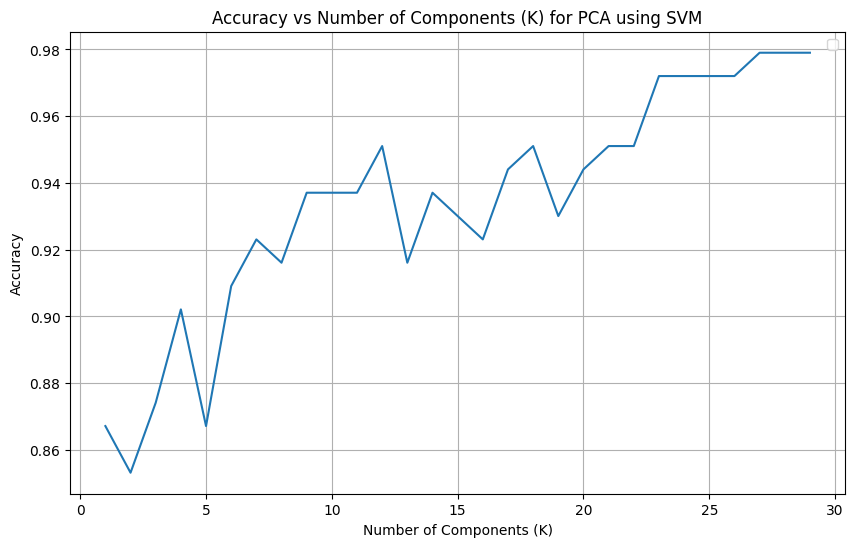

In [ ]:
plt.plot(accur[:,0],accur[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components (K) for PCA using SVM')
plt.legend()

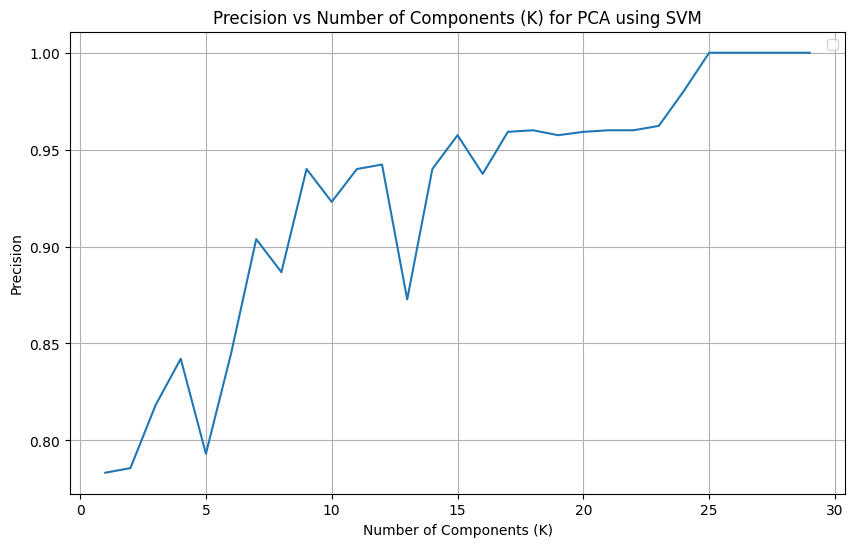

In [ ]:
plt.plot(prec[:,0],prec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs Number of Components (K) for PCA using SVM')
plt.legend()

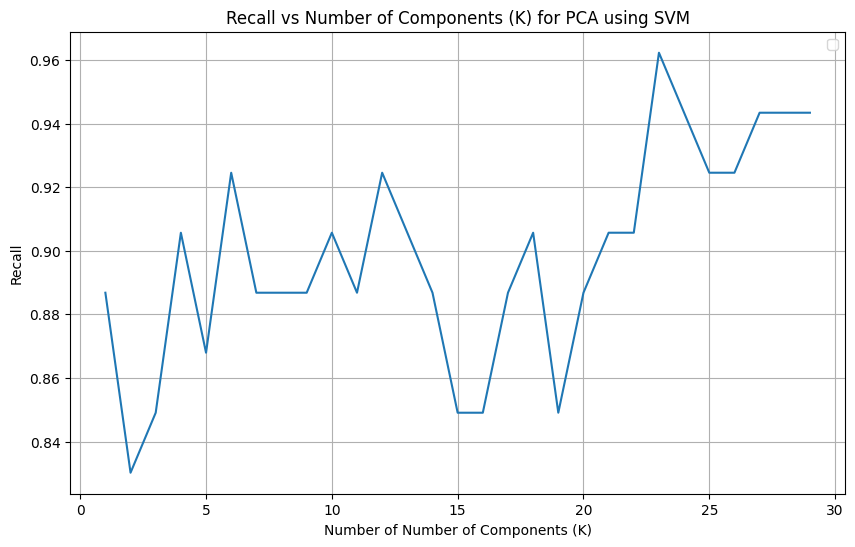

In [ ]:
plt.plot(rec[:,0],rec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Components (K) for PCA using SVM')
plt.legend()

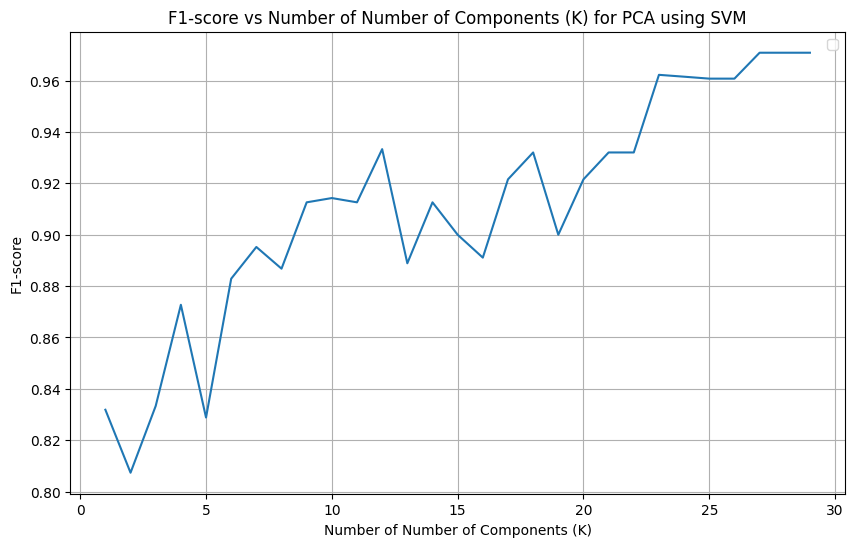

In [ ]:
plt.plot(f1[:,0],f1[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Number of Components (K) for PCA using SVM')
plt.legend()

## **3**
### Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels


In [ ]:
K=29
kern='sigmoid'
# kern='poly'
# kern='linear'
# kern='precomputed'
accur = np.zeros((K,2))
prec = np.zeros((K,2))
rec = np.zeros((K,2))
f1 = np.zeros((K,2))

for i in range(K):
    # X = df_cancer.iloc[:,1:31].values
    # Y = df_cancer.iloc[:,31].values
    # print(i)
    decomposer = PCA(n_components=i+1)
    X_r = decomposer.fit(X).transform(X)
    X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 0)
    sc_X = StandardScaler()
    X_train_r = sc_X.fit_transform(X_train_r)
    X_test_r = sc_X.transform(X_test_r)
    classifier = svm.SVC(kernel=kern)
    # classifier = svm.SVC(kernel='linear')
    # classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
    classifier.fit(X_train_r, Y_train)
    Y_pred = classifier.predict(X_test_r)
    accur [ i, 0]=i+1
    accur [i,1] = metrics.accuracy_score(Y_test, Y_pred)
    prec [ i, 0]=i+1
    prec [i,1] = metrics.precision_score(Y_test, Y_pred)
    rec [ i, 0]=i+1
    rec [i,1] = metrics.recall_score(Y_test, Y_pred)
    f1 [ i, 0]=i+1
    f1 [i,1] = metrics.f1_score(Y_test, Y_pred)

maximum_accur = max(accur[:,1])
print("Maximum Accuracy is:", maximum_accur)
print("Maximum Accuracy is at K:", accur[accur[:,1] == maximum_accur][0,0])


Maximum Accuracy is: 0.9790209790209791
Maximum Accuracy is at K: 27.0


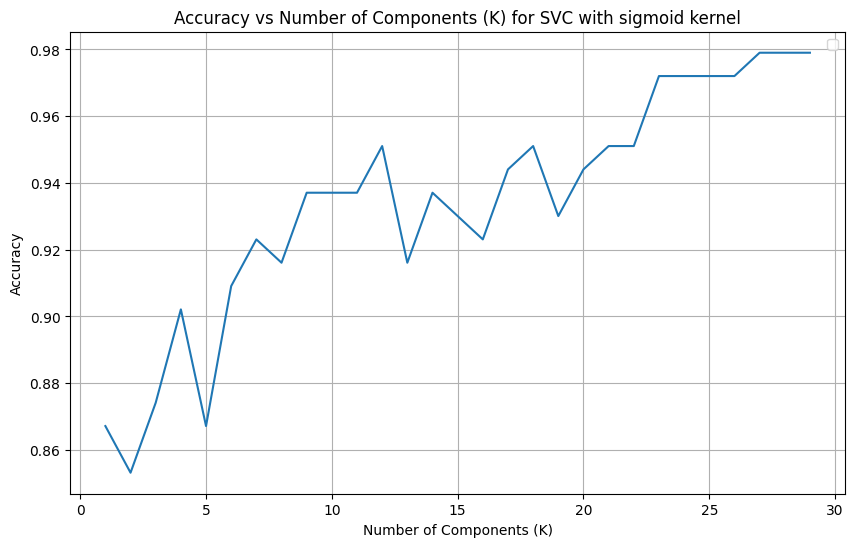

In [ ]:
plt.plot(accur[:,0],accur[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy vs Number of Components (K) for SVC with {kern} kernel')
plt.legend()

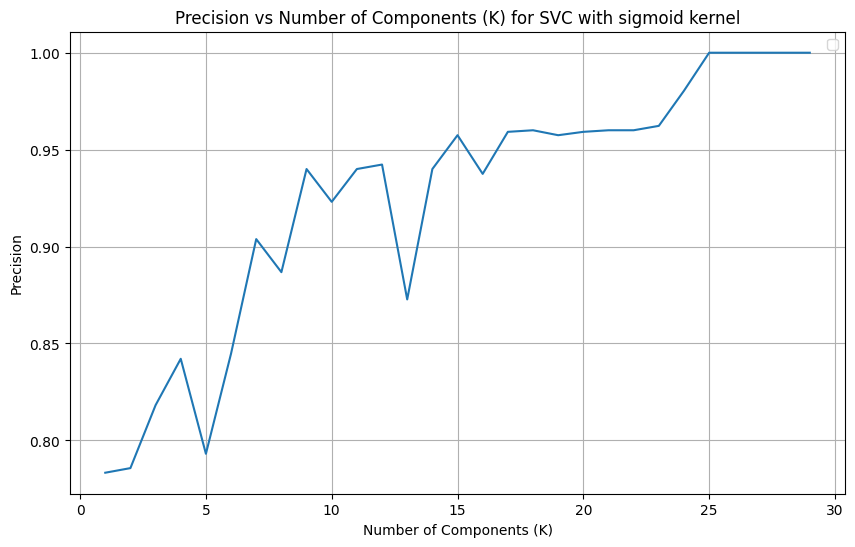

In [ ]:
plt.plot(prec[:,0],prec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Precision')
plt.title(f'Precision vs Number of Components (K) for SVC with {kern} kernel')
plt.legend()

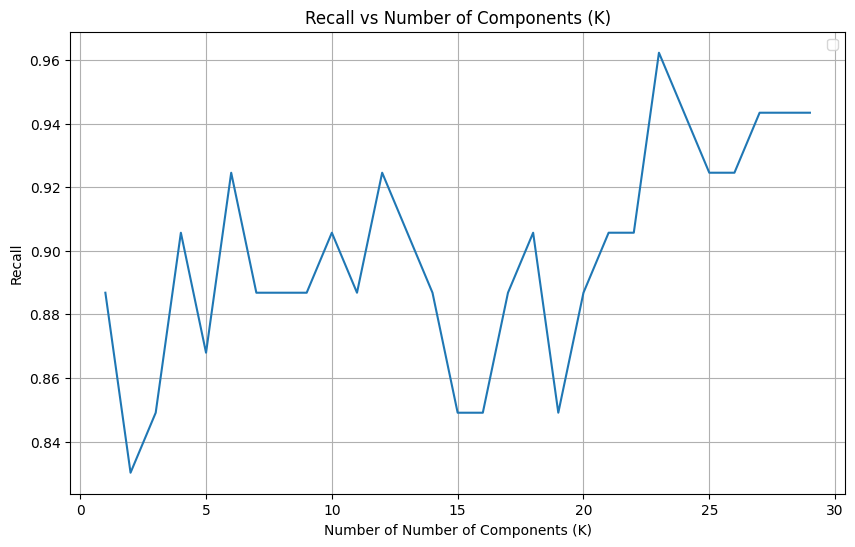

In [ ]:
plt.plot(rec[:,0],rec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Components (K)')
plt.legend()

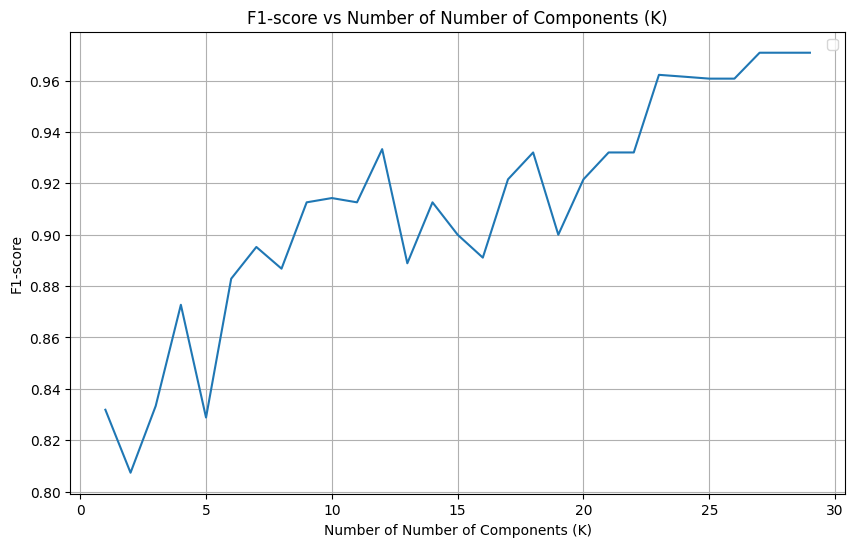

In [ ]:
plt.plot(f1[:,0],f1[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Number of Components (K)')
plt.legend()

## **Problem II**

## Develop an SVR regression model that predicts housing price based on the following input variables:

## Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [ ]:
file_path = '/content/drive/My Drive/Courses/Intro to ML/Lab2/Housing.csv'
df = pd.read_csv(file_path)

scaler = 'normalize'
# scaler = 'standard'
split = 0.20 # Split ratio
a = int(df.shape[0]*(1-split))

df_train = df.iloc[0:a,:]
df_test = df.iloc[a:,:]
y_train = df_train.values[:, 0]
y_test = df_test.values[:, 0]

df_train1 = (df_train.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_train = pd.concat([df_train.iloc[:,[0,1,2,3,4,10,12]], df_train1], axis = 1)

df_test1 = (df_test.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_test = pd.concat([df_test.iloc[:,[0,1,2,3,4,10,12]], df_test1], axis = 1)

df_train = df_train.drop(['furnishingstatus'], axis='columns')
df_test = df_test.drop(['furnishingstatus'], axis='columns')

if scaler == 'normalize':
    min_max_scaled= preprocessing.MinMaxScaler()
else:
    min_max_scaled= preprocessing.StandardScaler()

df_train_scaled = min_max_scaled.fit_transform(df_train)
df_test_scaled = min_max_scaled.fit_transform(df_test)
df_train_scaled = pd.DataFrame(df_train_scaled)
df_test_scaled = pd.DataFrame(df_test_scaled)

In [ ]:
X_train = df_train.iloc[:,1:11].values
Y_train = df_train.iloc[:,0].values

X_test = df_test.iloc[:,1:11].values
Y_test = df_test.iloc[:,0].values

X_train_scaled = df_train_scaled.iloc[:,1:11].values
Y_train_scaled = df_train_scaled.iloc[:,0].values

X_test_scaled = df_test_scaled.iloc[:,1:11].values
Y_test_scaled = df_test_scaled.iloc[:,0].values


## **1 & 4**
## Plot your regression model for SVR similar to the sample code provided on Canvas

## Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels

In [ ]:
rbf_classifier = SVR(kernel='rbf', C=1e3, gamma=0.1)
linear_classifier = SVR(kernel='linear', C=1e3)
poly_classifier = SVR(kernel='poly', C=1e3, degree=2)

Y_rbf_train = rbf_classifier.fit(X_train_scaled,Y_train_scaled).predict(X_train_scaled)
Y_linear_train = linear_classifier.fit(X_train_scaled,Y_train_scaled).predict(X_train_scaled)
Y_poly_train = poly_classifier.fit(X_train_scaled,Y_train_scaled).predict(X_train_scaled)

print("RBF Accuracy on train dataset:", metrics.mean_squared_error(Y_train_scaled, Y_rbf_train))
print("Linear Accuracy on train dataset:", metrics.mean_squared_error(Y_train_scaled, Y_linear_train))
print("Poly Accuracy on train dataset:", metrics.mean_squared_error(Y_train_scaled, Y_poly_train))

Y_rbf_test = rbf_classifier.fit(X_train_scaled,Y_train_scaled).predict(X_test_scaled)
Y_linear_test = linear_classifier.fit(X_train_scaled,Y_train_scaled).predict(X_test_scaled)
Y_poly_test = poly_classifier.fit(X_train_scaled,Y_train_scaled).predict(X_test_scaled)

print("RBF Accuracy on test dataset:", metrics.mean_squared_error(Y_test_scaled, Y_rbf_test))
print("Linear Accuracy on test dataset:", metrics.mean_squared_error(Y_test_scaled, Y_linear_test))
print("Poly Accuracy on test dataset:", metrics.mean_squared_error(Y_test_scaled, Y_poly_test))


RBF Accuracy on train dataset: 0.007487759401741311
Linear Accuracy on train dataset: 0.01255198737752924
Poly Accuracy on train dataset: 0.010114020031745748
RBF Accuracy on test dataset: 0.33018912513354776
Linear Accuracy on test dataset: 0.3420562306538017
Poly Accuracy on test dataset: 0.3382649486376664


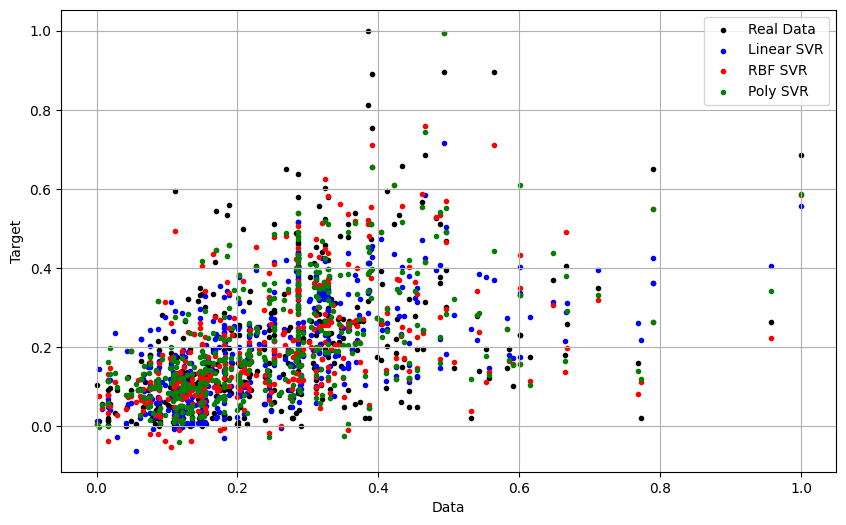

In [ ]:
plt.scatter(X_train_scaled[:,0], Y_train_scaled,color='k',marker= '.', label='Real Data')
plt.scatter(X_train_scaled[:,0], Y_linear_train,color='b',marker= '.', label='Linear SVR')
plt.scatter(X_train_scaled[:,0],Y_rbf_train, color='r', marker= '.', label='RBF SVR')
plt.scatter(X_train_scaled[:,0],Y_poly_train, color='g', marker= '.',label='Poly SVR')

plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.grid()


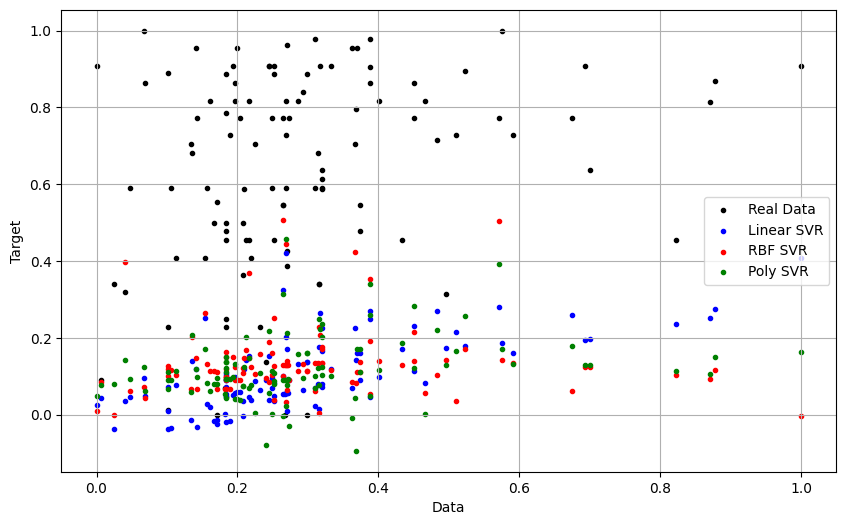

In [ ]:
plt.scatter(X_test_scaled[:,0], Y_test_scaled,color='k',marker= '.', label='Real Data')
plt.scatter(X_test_scaled[:,0], Y_linear_test,color='b',marker= '.', label='Linear SVR')
plt.scatter(X_test_scaled[:,0],Y_rbf_test, color='r', marker= '.', label='RBF SVR')
plt.scatter(X_test_scaled[:,0],Y_poly_test, color='g', marker= '.',label='Poly SVR')

plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.grid()

## **2**
## Compare your results against linear regression with regularization loss that you already did in assignment 1

## **3**
## Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy

In [ ]:
K=10
mse = np.zeros((K,2))

for i in range(K):
    decomposer = PCA(n_components=i+1)
    X_train_r = decomposer.fit(X_train_scaled).transform(X_train_scaled)
    rbf_classifier = SVR(kernel='rbf',C=1e3, gamma=0.1)
    Y_rbf = rbf_classifier.fit(X_train_r,Y_train_scaled).predict(X_train_r)
    mse [ i, 0]=i+1
    mse [i,1] = metrics.mean_squared_error(Y_train_scaled, Y_rbf)

minimum_mse = min(mse[:,1])
print("Minimum Squared Error (MSE) is:", minimum_mse)
print("Best MSE happens at K:", mse[mse[:,1] == minimum_mse][0,0])

Minimum Squared Error (MSE) is: 0.00748775940173662
Best MSE happens at K: 10.0


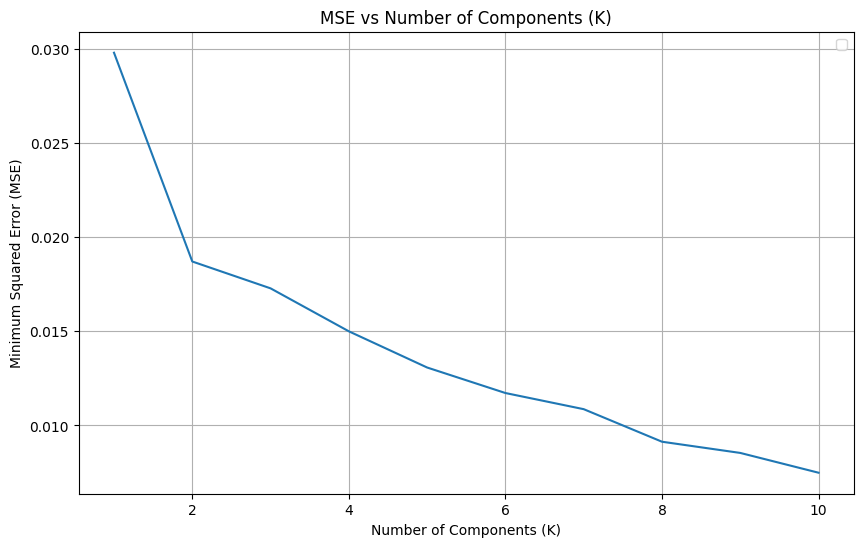

In [ ]:
plt.plot(mse[:,0],mse[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Minimum Squared Error (MSE)')
plt.title('MSE vs Number of Components (K)')
plt.legend()

In [ ]:
i=10
decomposer = PCA(n_components=i)
X_train_r = decomposer.fit(X_train_scaled).transform(X_train_scaled)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
# X_test_r = sc_X.transform(X_test_r)
rbf_classifier = SVR(kernel='rbf',C=1e3, gamma=0.1)
Y_rbf = rbf_classifier.fit(X_train_r,Y_train_scaled).predict(X_train_r)

print("RBF Accuracy:", metrics.mean_squared_error(Y_train_scaled, Y_rbf))

RBF Accuracy: 0.006088506967111909
